In [22]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Load the datasets
df= pd.read_csv(r"C:\Users\Abiya\OneDrive\Desktop\Walmart_Sales.csv")
df.head(11)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [11]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Data Cleaning

In [23]:
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y")

In [24]:
df.isnull().sum()

Store              0
Date            3870
Weekly_Sales       0
Holiday_Flag       0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(0)

#### Detect Outliers in Weekly Sales


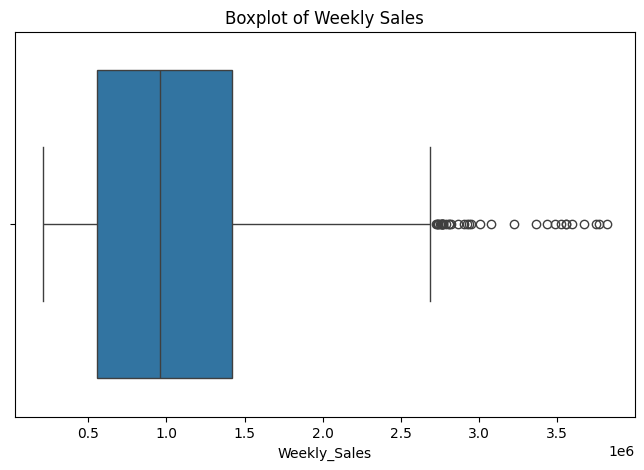

In [ ]:
# Boxplot for Weekly Sales
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Weekly_Sales"])
plt.title("Boxplot of Weekly Sales")
plt.show()

In [ ]:
# Summary statistics
df["Weekly_Sales"].describe()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

In [ ]:
# Aggregate sales by date
sales_trend = df.groupby("Date")["Weekly_Sales"].sum()

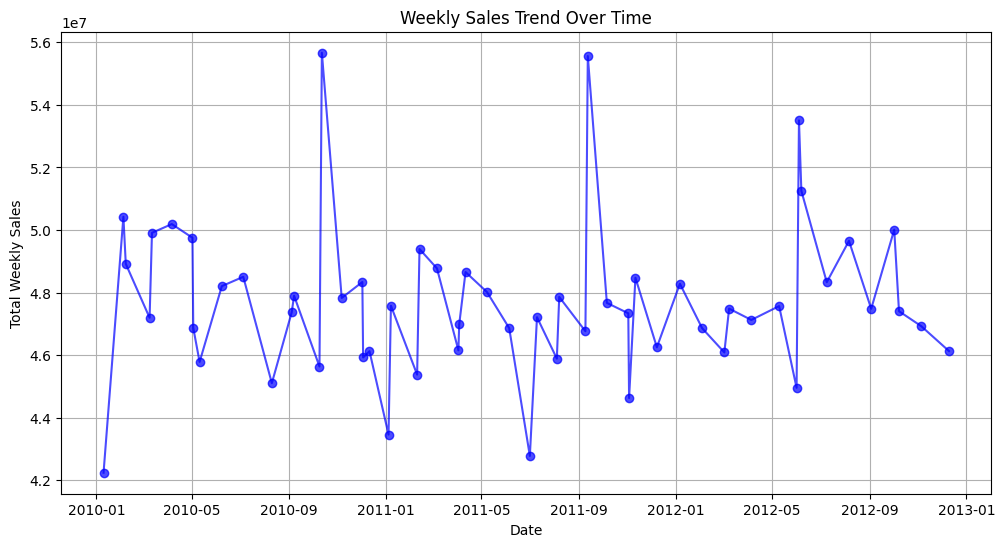

In [31]:
#Plot sales trends
plt.figure(figsize=(12,6))
plt.plot(sales_trend, marker="o", linestyle="-", color="b", alpha=0.7)
plt.title("Weekly Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.grid(True)
plt.show()

#### Holiday vs Non-Holiday Sales

In [32]:
holiday_sales = df.groupby("Holiday_Flag")["Weekly_Sales"].mean()

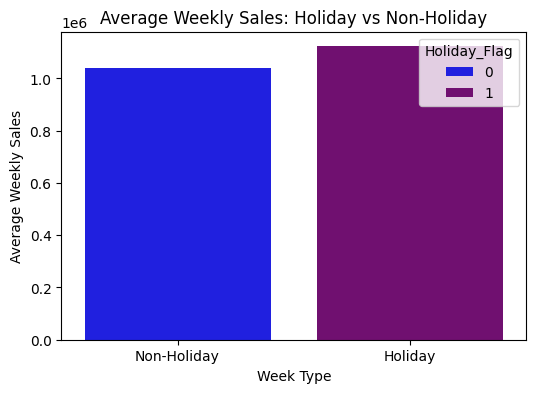

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values,hue= holiday_sales.index, palette=["blue","purple"])
plt.xticks([0,1],["Non-Holiday","Holiday"])
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.xlabel("Week Type")
plt.ylabel("Average Weekly Sales")
plt.show()

In [36]:
holiday_sales

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

### Correlation Analysis


In [37]:
correlation_matrix = df[["Weekly_Sales", "Temperature","Fuel_Price","CPI","Unemployment"]].corr()

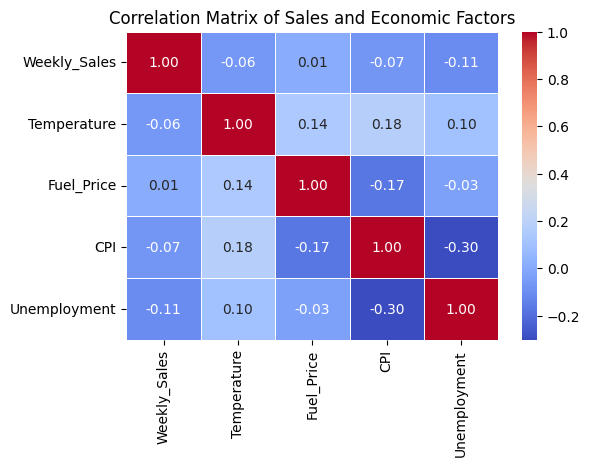

In [38]:
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sales and Economic Factors")
plt.show()